In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
from __future__ import division
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
sns.set(style='ticks', palette='Set2')
%matplotlib inline

# Encouraging sparse solutions: L1 regularization and Lasso

In the same way that in Ridge regression we modify the objective, here too we do the same thing, and again with a regularizer. Instead of using the squared Euclidean norm, we use the so-called L1 norm. Thus, instead of solving for the minimizer of the Sum of the Squared Error (SSE), we solve:

$$
\min_{\beta}:\,\, {\rm SSE}(\beta) + \lambda \sum |\beta_i| =  {\rm SSE}(\beta) + \lambda \|\beta\|_1.
$$

Why should we expect this to encourage sparsity?

In [97]:
# generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)

# beta generated with 10 nonzeros
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Exercise: use (1) Ordinary Least Squares, (2) Regression, and (3) Lasso, to see what each is doing with respect to sparsity. Compute the $R^2$ values for each, and also plot the coefficients vs the true coefficients.

In [98]:
# Standard Regression
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train,y_train).predict(X_test)
y_pred_OLS = OLS.fit(X_train, y_train).predict(X_test)
r2_score_OLS = r2_score(y_test, y_pred_OLS)
#print(OLS)
print("R^2 on test data : %f" % r2_score_OLS)

R^2 on test data : 0.029330


The $R^2$ value is not very good. Let's see what the coefficients look like compared to the true coefficients.

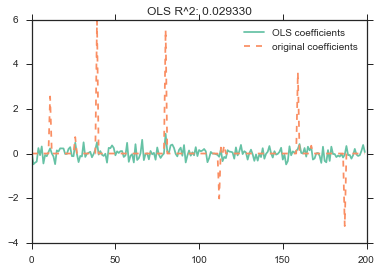

In [89]:
plt.plot(OLS.coef_, label='OLS coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("OLS R^2: %f"
          % (r2_score_OLS))
plt.show()

In [99]:
# Ridge regression
from sklearn.linear_model import Ridge
alpha = 0.1
ridge = Ridge(alpha = alpha)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
#print(lasso)
print("R^2 on test data : %f" % r2_score_ridge)

R^2 on test data : 0.043210


Again, the $R^2$ value is not very good. Let's see what the coefficients look like compared to the true coefficients.

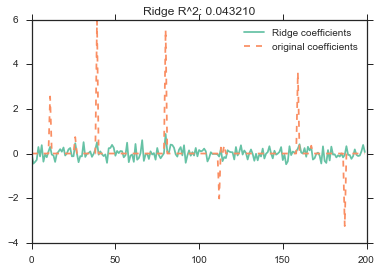

In [100]:
plt.plot(ridge.coef_, label='Ridge coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Ridge R^2: %f"
          % (r2_score_ridge))
plt.show()

In [101]:
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
print("R^2 on test data : %f" % r2_score_lasso)

R^2 on test data : 0.384710


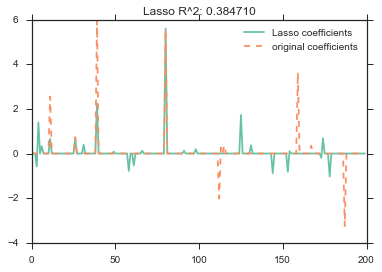

In [102]:
# We plot the results
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

# Exercise: what happens as alpha grows?

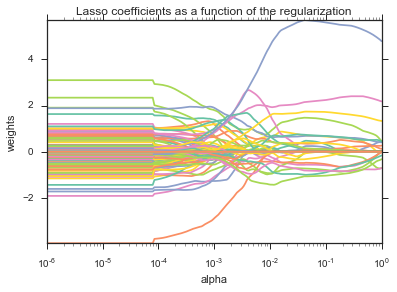

In [94]:
n_alphas = 200
alphas = np.logspace(-6, 0, n_alphas)
#clf = linear_model.Ridge(fit_intercept=False)

coefs = []
r_sq = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    r_sq.append(r2_score_lasso)

    
###############################################################################
# Display results

ax = plt.gca()
#ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

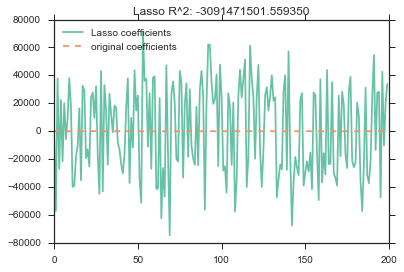

In [95]:
# This should be showing that for very small alpha, the solution is dense
# As alpha grows, we can see just a few of the coefficients separating out.
#
# Let's check
alpha = 10^-5
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

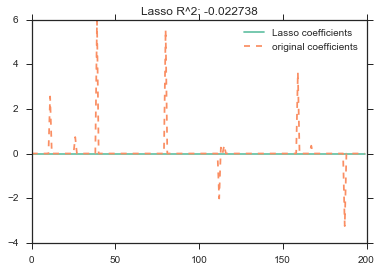

In [103]:
# We repeat for bigger alpha
#
alpha = 40
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

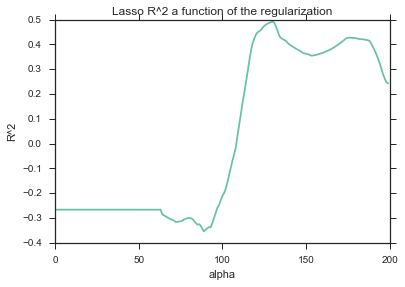

In [82]:
# Now let's plot the R^2 values
plt.plot(r_sq)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('Lasso R^2 a function of the regularization')
#plt.axis('tight')
plt.show()